In [1]:
# Run this cell to mount your Google Drive.

from IPython.display import clear_output
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Imports

In [2]:
# !pip install rlcard
!pip install rlcard[torch]
!pip install rlcard[tensorflow]

clear_output()

In [3]:
import torch
import numpy as np
import tensorflow
import os

# import rlcard
# from rlcard.agents import RandomAgent
# from rlcard.utils import set_global_seed, tournament
# from rlcard.utils import Logger

# path
pth = '/content/drive/MyDrive/Colab Notebooks/Thesis'

%cd /content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning

from MLP import *
from models import *


# remove pycache
%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/agents/
%rm -r __pycache__
%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/envs/
%rm -r __pycache__
%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/games/
%rm -r __pycache__
%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/utils/
%rm -r __pycache__
%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/
%rm -r __pycache__

%cd /content/drive/My Drive/Colab Notebooks/Thesis/dqn

import rlcard
from rlcard.agents.random_agent import RandomAgent
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger
from rlcard.agents.dqn_agent_pytorch import DQNAgent
# from DQNAgent_pytorch import DQNAgent

%cd /content/drive/My Drive/Colab Notebooks/Thesis

/content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning
/content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/agents
/content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/envs
/content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/games
/content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard/utils
/content/drive/My Drive/Colab Notebooks/Thesis/dqn/rlcard
/content/drive/My Drive/Colab Notebooks/Thesis/dqn
/content/drive/My Drive/Colab Notebooks/Thesis


# DQN Models

## all_states_all_actions_2hl_extra_knock_data_40K

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_40K'
dqn_model_name = 'all_states_all_actions_2hl_extra_knock_data_40K'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_2HL(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=520, bias=True)
  (l3): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.20679999999999968
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.34822678565979004
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.5819202661514282
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.5173667073249817
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.37212714552879333
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4484, rl-loss: 0.4371311664581299
----------------------------------------
  timestep     |  8940
  reward       |  0.25059999999999966
----------------------------------------
INFO - Agent dqn, step 5000, rl-loss: 0.3787386417388916
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.34643125534057617
INFO - Copied model parameters to target network.
INFO - Agent

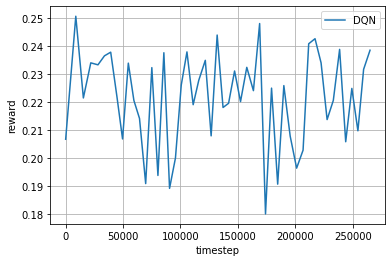

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## all_states_all_actions

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.42462486028671265
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.35666120052337646
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.46394774317741394
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.26728540658950806
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4685, rl-loss: 0.29888513684272766
----------------------------------------
  timestep     |  9347
  reward       |  0.18779999999999977
----------------------------------------
INFO - Agent dqn, step 5000, rl-loss: 0.3649541437625885
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.3121812641620636
INFO - Copied model parameters to target network.
INFO - Age

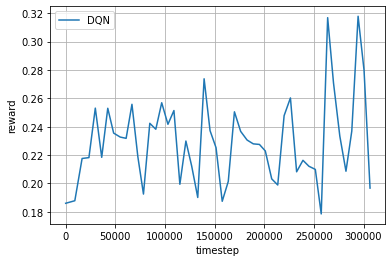

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## bpbd, draw, all_states_all_actions

### Parameters

In [ ]:
# Pretrain model selection
state = 'bpbd'
action = 'draw'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (sig): Sigmoid()
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.33770000000000006
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.6300584673881531
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.7038441896438599
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.5811948180198669
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.5533424615859985
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4805, rl-loss: 0.4326890707015991
----------------------------------------
  timestep     |  9608
  reward       |  -0.3958999999999999
----------------------------------------
INFO - Agent dqn, step 5000, rl-loss: 0.6287760734558105
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.6328587532043457
INFO - Copied model parameters to target network.
INFO - Agent d

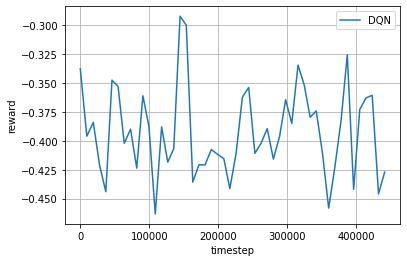

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## apbd, discard, all_states_all_actions

### Parameters

In [ ]:
# Pretrain model selection
state = 'apbd'
action = 'discard'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (sig): Sigmoid()
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.1573
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.8197994232177734
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.7358076572418213
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6394292116165161
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.6357061266899109
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.5975127220153809
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5573, rl-loss: 0.5555555820465088
----------------------------------------
  timestep     |  11137
  reward       |  0.054899999999999984
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.5986510515213013
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 700

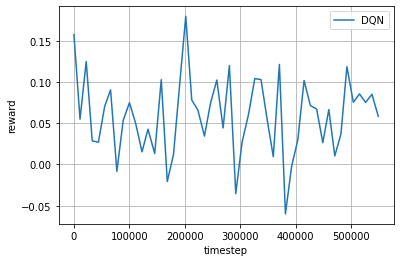

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## apbd, knock, all_states_all_actions

### Parameters

In [ ]:
# Pretrain model selection
state = 'apbd'
action = 'knock'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.3342
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.7743442058563232
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.7082974314689636
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6947224140167236
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.7435239553451538
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.7004126906394958
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5937, rl-loss: 0.7619070410728455
----------------------------------------
  timestep     |  11871
  reward       |  -0.4170000000000001
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.7857310771942139
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 700

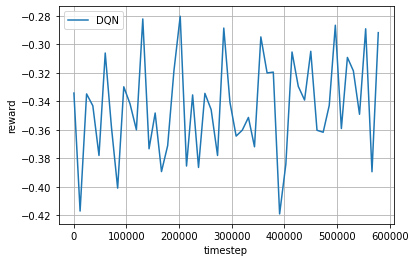

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## baseline

### Parameters

In [ ]:
# Pretrain model selection
state = 'base'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/base'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.49010000000000004
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 3.698153523146175e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.0113848140463233
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.03157569840550423
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.0144523736089468
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.012015722692012787
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 3.218220626877155e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6146, rl-loss: 0.018052522093057632
----------------------------------------
  timestep     |  12293
  reward       |  -0.5465999999999999
----------------------------------------
IN

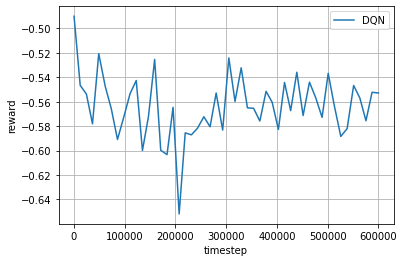

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/base'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## all_states_all_actions, Batch Norm

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions_batch_norm'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = True

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): BatchNorm1d(260, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Linear(in_features=260, out_features=520, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=520, out_features=110, bias=True)
  (5): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[2].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[2].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[4].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[4].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[2].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[2].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[4].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[4].bias = torch.nn.Parameter(model.l2.bias)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.2.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.2.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.4.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.4.bias'] = model_dict['l2.bias']

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------

----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.6462568640708923
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 1000, rl-loss: 0.6462568640708923
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.4886203706264496
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.4886203706264496
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6641438603401184
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6641438603401184
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.7088682055473328
INFO - Copied m

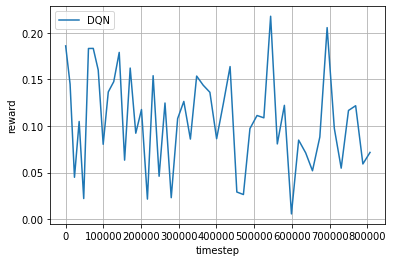

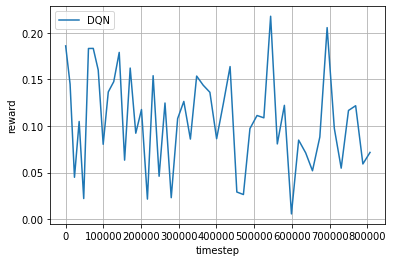


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.6462568640708923
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.4886203706264496
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6641438603401184
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.7088682055473328
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.6000561714172363
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5922, rl-loss: 0.49826592206954956
----------------------------------------
  timestep     |  11845
  reward       |  0.145
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.5426924824714661
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 7000

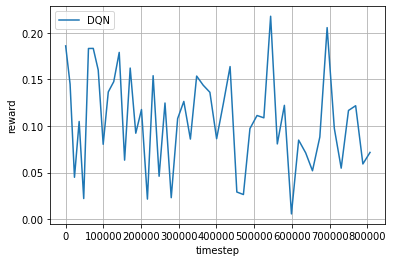


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.6462568640708923
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.4886203706264496
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6641438603401184
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.7088682055473328
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.6000561714172363
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5922, rl-loss: 0.49826592206954956
----------------------------------------
  timestep     |  11845
  reward       |  0.145
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.5426924824714661
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 7000

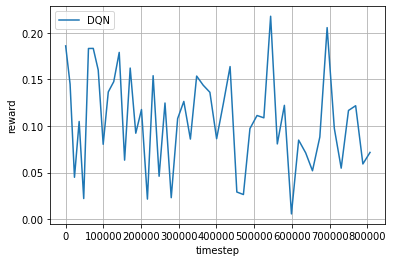


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.6462568640708923
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.4886203706264496
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.6641438603401184
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.7088682055473328
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.6000561714172363
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5922, rl-loss: 0.49826592206954956
----------------------------------------
  timestep     |  11845
  reward       |  0.145
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.5426924824714661
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 7000

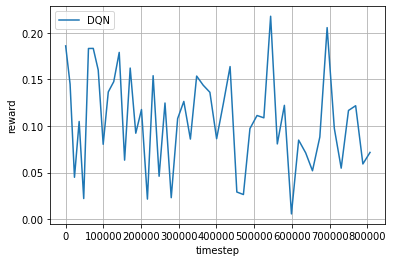

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## all_states_all_actions_2hl_extra_knock_data_80K

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
dqn_model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_2HL(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=520, bias=True)
  (l3): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}/{}/{}'.format(state,action,model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520],
                 device=device)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.2266999999999996
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.5587524175643921
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.492828369140625
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.4017060399055481
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.43805211782455444
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4297, rl-loss: 0.3594033420085907
----------------------------------------
  timestep     |  8556
  reward       |  0.23639999999999955
----------------------------------------
INFO - Agent dqn, step 5000, rl-loss: 0.39183318614959717
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.3153235912322998
INFO - Copied model parameters to target network.
INFO - Agent dq

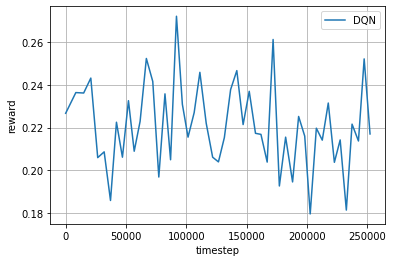

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}/{}/{}'.format(state,action,dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

## TEST - proper weight loading

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.0005

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

In [ ]:
# load pretrained weights
# 'freezing weights' VVV
# agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
# agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
# agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
# agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

# agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
# agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
# agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
# agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.18599999999999972
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.42462486028671265
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.32992714643478394
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.39580875635147095
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.5027810335159302
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4923, rl-loss: 0.37581637501716614
----------------------------------------
  timestep     |  9819
  reward       |  0.19749999999999995
----------------------------------------
INFO - Agent dqn, step 5000, rl-loss: 0.3330018222332001
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.2250313013792038
INFO - Copied model parameters to target network.
INFO - Agen

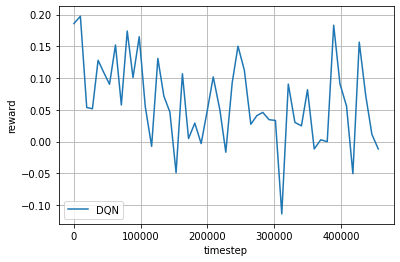

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

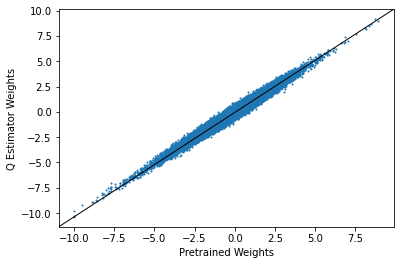

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST - 1 extra non-pretrained layer (OVERWRITTEN)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST2'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 5000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.0005

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=110, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = model_dqn_dict['fc_layers.5.weight']
pretrained_dict['fc_layers.5.bias'] = model_dqn_dict['fc_layers.5.bias']

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.5479000000000002
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 2.6537669327808544e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 2.6275461095792707e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.014464303851127625
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 2.296441834914731e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 3.0240305477491347e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 2.0029117422382114e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6079, rl-loss: 7.615226422785781e-06
----------------------------------------
  timestep     |  12159
  reward       |  -0.47559999999999997
------------------------------

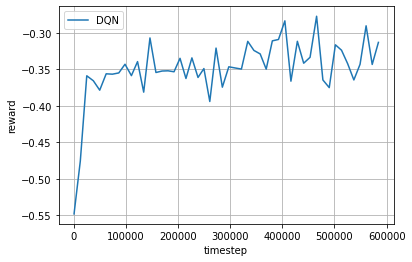

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

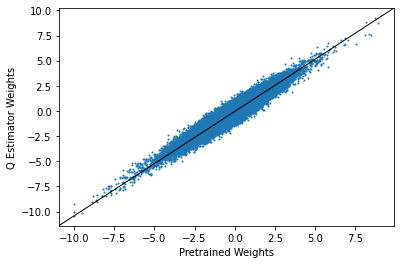

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST2 - 1 extra non-pretrained layer, frozen layers

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST2'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST2'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=110, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# load pretrained weights
# 'freezing weights' VVV
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.5479000000000002
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 7.233977157738991e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 2.0690986275440082e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.014864729717373848
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.006016524508595467
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 2.3460823285859078e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5867, rl-loss: 2.2839565644972026e-05
----------------------------------------
  timestep     |  11733
  reward       |  -0.5750999999999997
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.009718010202050209
INFO - Copied model parameters to target ne

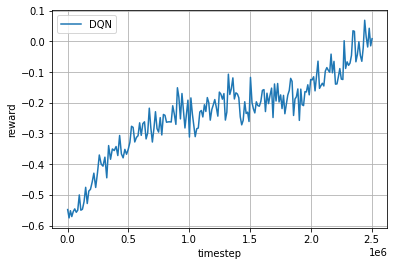

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST2'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST2/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST2/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

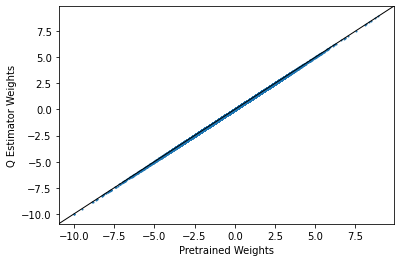

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST3 - 1 extra non-pretrained layer, frozen layers ->  unfrozen layers

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST3'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST3'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
checkpoint = torch.load('models/dqn/TEST2/model_posttrain.pth', map_location=device)

In [ ]:
agent.load(checkpoint)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.06080000000000002
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.011083344928920269
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.005301402881741524
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.022326454520225525
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.021330174058675766
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.006353915203362703
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.0039015922229737043
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6341, rl-loss: 0.00560488598421216
----------------------------------------
  timestep     |  12682
  reward       |  0.005900000000000001
---------------------------------------

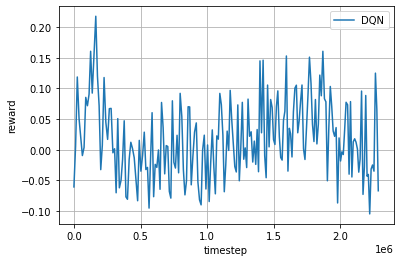

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST3'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST3/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST3/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

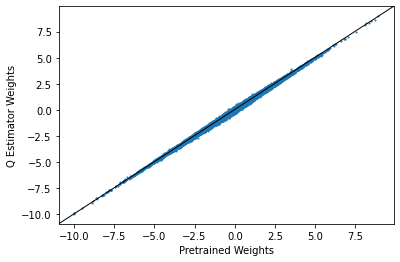

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST4 - 1 extra non-pretrained layer, frozen layers, (all_states_all_actions_2hl_extra_knock_data_40K)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_40K'
dqn_model_name = 'TEST4'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_2HL(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=520, bias=True)
  (l3): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST4'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=110, out_features=110, bias=True)
  (8): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# load pretrained weights
# 'freezing weights' VVV
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.6154000000000001
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 9.876392141450197e-06
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 3.872447996400297e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.014764592051506042
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.012703420594334602
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 3.574862057575956e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.012702644802629948
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6186, rl-loss: 0.03691422939300537
----------------------------------------
  timestep     |  12374
  reward       |  -0.5647
----------------------------------------
INFO - Age

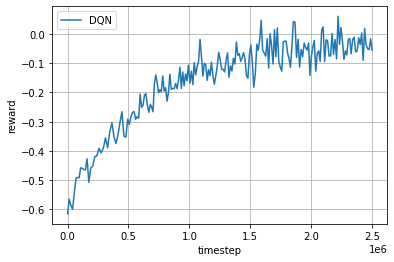

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST4'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST4/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST4/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

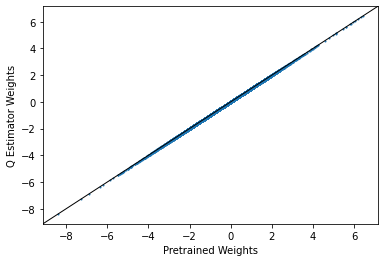

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST5 - 1 extra non-pretrained layer, frozen layers (Doubled training time)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST5'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 40000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

In [ ]:
torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

MLP_base(
  (l1): Linear(in_features=260, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=110, bias=True)
  (act_fnc): Sigmoid()
  (sfx): Softmax(dim=1)
)

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST5'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=110, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)

# load pretrained weights
# 'freezing weights' VVV
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

### Train

Streaming output truncated to the last 5000 lines.
INFO - Agent dqn, step 680000, rl-loss: 0.001382823335006833
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 681000, rl-loss: 6.288247095653787e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 682000, rl-loss: 0.014539020135998726
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 683000, rl-loss: 0.005279559642076492
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 684000, rl-loss: 5.736384628107771e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 685000, rl-loss: 0.0009933708934113383
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 686000, rl-loss: 0.001335109118372202
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 686119, rl-loss: 0.0013330384390428662
----------------------------------------
  timestep     |  1371338
  reward       |  -0.18779999999999997
-

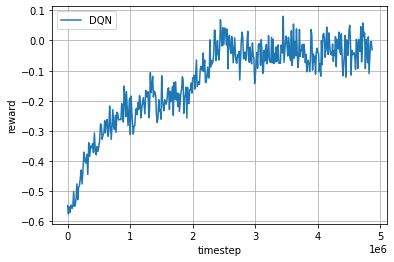

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST5'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST5/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST5/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

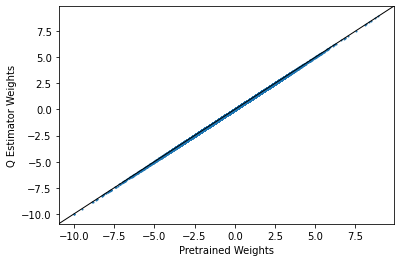

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST6 - TEST5 with additional training (frozen -> unfrozen layers)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST6'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/TEST6'

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
checkpoint = torch.load('models/dqn/TEST5/model_posttrain.pth', map_location=device)

In [ ]:
agent.load(checkpoint)

### Train


----------------------------------------
  timestep     |  136
  reward       |  -0.07310000000000003
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.02025788277387619
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.014017753303050995
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.04134221747517586
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.016312580555677414
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.022131115198135376
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.01066267117857933
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6306, rl-loss: 0.013686359860002995
----------------------------------------
  timestep     |  12603
  reward       |  0.0295
----------------------------------------
INFO - Agent dq

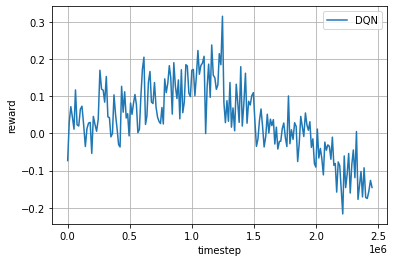

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/TEST6'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/TEST6/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/TEST6/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST7 - Hardcoded top layer weights

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'TEST7'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 110],
                 learning_rate=learning_rate,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=110, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=110, out_features=110, bias=True)
  (6): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = torch.tensor(np.eye(110), device=device)
# pretrained_dict['fc_layers.5.weight'] = model_dqn_dict['fc_layers.5.weight']
pretrained_dict['fc_layers.5.bias'] = model_dqn_dict['fc_layers.5.bias']

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [ ]:
# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)

In [ ]:
# import numpy as np
# torch.tensor(np.eye(110), device=device)
# model_dqn_dict['fc_layers.5.weight']

Parameter containing:
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]], device='cuda:0', requires_grad=True)

### Train

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))


----------------------------------------
  timestep     |  136
  reward       |  0.1247999999999999
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.007263000123202801
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.005049353465437889
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.01602236181497574
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 6.852297519799322e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 6.0470993048511446e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5600, rl-loss: 0.0012054939288645983
----------------------------------------
  timestep     |  11186
  reward       |  0.26389999999999963
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 3.065233613597229e-05
INFO - Copied model parameters to target networ

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

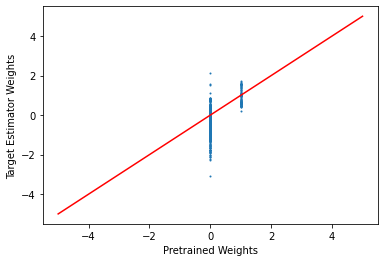

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST8 - Hardcoded top layer weights, copy biases (all_states_all_actions_2hl_extra_knock_data_40K)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_40K'
dqn_model_name = 'TEST8'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=110, out_features=110, bias=True)
  (8): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = model_dict['l3.weight']
pretrained_dict['fc_layers.5.bias'] = model_dict['l3.bias']
pretrained_dict['fc_layers.7.weight'] = torch.tensor(np.eye(110), device=device)
pretrained_dict['fc_layers.7.bias'] = torch.tensor(np.ones(110), device=device)

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [ ]:
# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

In [ ]:
# import numpy as np
# torch.tensor(np.eye(110), device=device)
# model_dqn_dict['fc_layers.5.weight']

Parameter containing:
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]], device='cuda:0', requires_grad=True)

### Train

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))


----------------------------------------
  timestep     |  136
  reward       |  0.2258999999999996
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 6.414948438759893e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.006037230137735605
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.0043989005498588085
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.006318191532045603
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.0037881971802562475
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6000, rl-loss: 0.0037638326175510883
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 6058, rl-loss: 0.013400059193372726
----------------------------------------
  timestep     |  12100
  reward       |  0.2519999999999998
---------------------------------------

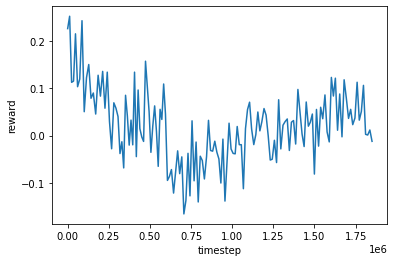

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dqn_model_name = 'TEST8'
log_dir = './plots/dqn/{}'.format(dqn_model_name)
vals = pd.read_csv('{}/performance.csv'.format(log_dir))
plt.plot(vals['timestep'].values,vals['reward'].values)
plt.xlabel('timestep')
plt.ylabel('reward')
plt.savefig('{}/fig.png'.format(log_dir))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

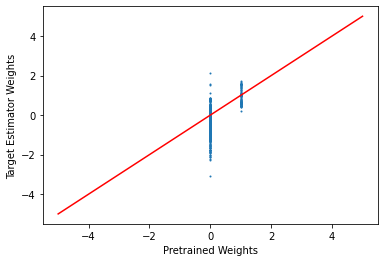

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST9 - Hardcoded top layer weights, copy biases (all_states_all_actions_2hl_extra_knock_data_80K)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
dqn_model_name = 'TEST9'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=110, out_features=110, bias=True)
  (8): Softmax(dim=1)
)

In [ ]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = model_dict['l3.weight']
pretrained_dict['fc_layers.5.bias'] = model_dict['l3.bias']
pretrained_dict['fc_layers.7.weight'] = torch.tensor(np.eye(110), device=device)
pretrained_dict['fc_layers.7.bias'] = torch.tensor(np.ones(110), device=device)

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [ ]:
# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

In [ ]:
# import numpy as np
# torch.tensor(np.eye(110), device=device)
# model_dqn_dict['fc_layers.5.weight']

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.21329999999999985
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.0025337631814181805
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.0019774558022618294
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 3.3155207347590476e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 2.9627040930790827e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.006638033781200647
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5908, rl-loss: 0.009243926033377647
----------------------------------------
  timestep     |  11814
  reward       |  0.3273
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.009237010031938553
INFO - Copied model parameters to target network.
INFO - 

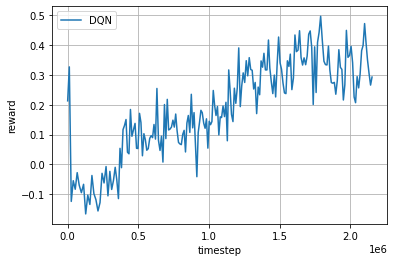

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

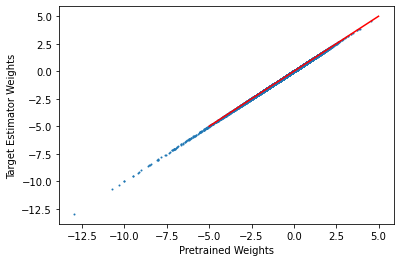

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST10 - TEST9 with additional training (frozen -> unfrozen (all_states_all_actions_2hl_extra_knock_data_80K)

### Parameters

In [ ]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
dqn_model_name = 'TEST10'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [ ]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)
    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
env.set_agents([agent, random_agent])
eval_env.set_agents([agent, random_agent])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [ ]:
checkpoint = torch.load('models/dqn/TEST9/model_posttrain.pth', map_location=device)

In [ ]:
agent.load(checkpoint)

### Train


----------------------------------------
  timestep     |  136
  reward       |  0.3072
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.021635986864566803
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.019072894006967545
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.014900906011462212
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.01934671774506569
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 0.014217903837561607
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5653, rl-loss: 0.01903444528579712
----------------------------------------
  timestep     |  11290
  reward       |  0.3797
----------------------------------------
INFO - Agent dqn, step 6000, rl-loss: 0.014301421120762825
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 7000,

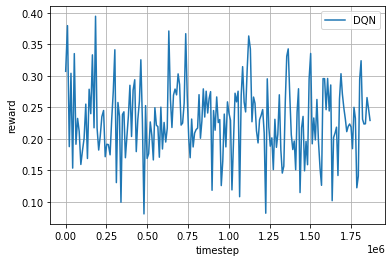

In [ ]:
# Save model prior to training
save_dir = 'models/dqn/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [ ]:
model_dqn_pre = torch.load('models/dqn/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

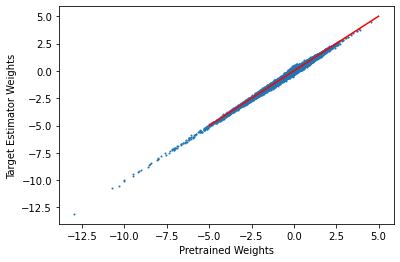

In [ ]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

# DQN Models - Selfplay

## TEST1 - Hardcoded top layer weights, copy biases (all_states_all_actions_2hl_extra_knock_data_80K), 10K episodes

### Parameters

In [4]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
dqn_model_name = 'TEST1'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 10000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()

In [5]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/selfplay/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)
agent2 = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)

    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
# env.set_agents([agent, random_agent])
# eval_env.set_agents([agent, random_agent])

env.set_agents([agent, agent2])
eval_env.set_agents([agent, agent2])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False



### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [6]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=110, out_features=110, bias=True)
  (8): Softmax(dim=1)
)

In [7]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = model_dict['l3.weight']
pretrained_dict['fc_layers.5.bias'] = model_dict['l3.bias']
pretrained_dict['fc_layers.7.weight'] = torch.tensor(np.eye(110), device=device)
pretrained_dict['fc_layers.7.bias'] = torch.tensor(np.ones(110), device=device)

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

agent2.q_estimator.qnet.load_state_dict(pretrained_dict)
agent2.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [8]:
# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)


agent2.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent2.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent2.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent2.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent2.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent2.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent2.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent2.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent2.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent2.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent2.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent2.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

### Train

Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time

----------------------------------------
  timestep     |  120
  reward       |  -0.008899999999999993
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.007875500246882439
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.014924157410860062
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.007641153875738382
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.016627490520477295
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 2.450070678605698e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5841, rl-loss: 0.009128694422543049Oopsie, stuck in infinite loop... reset time

-------------------------

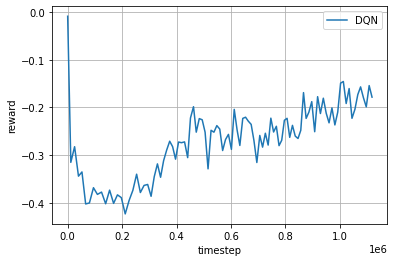

In [9]:
# Save model prior to training
save_dir = 'models/dqn/selfplay/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [10]:
model_dqn_pre = torch.load('models/dqn/selfplay/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/selfplay/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [11]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [12]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [14]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

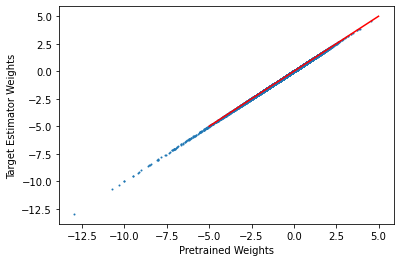

In [17]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## TEST2 - Hardcoded top layer weights, copy biases (all_states_all_actions_2hl_extra_knock_data_80K), 20K episodes

### Parameters

In [18]:
# Pretrain model selection
state = 'all'
action = 'all'
model_name = 'all_states_all_actions_2hl_extra_knock_data_80K'
dqn_model_name = 'TEST2'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
evaluate_num = 100  # mahjong_dqn has 1000
episode_num = 20000  # mahjong_dqn has 100000

# learning rate
# learning_rate = 0.00005
learning_rate = 0.00001

# The initial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# Batch Normalization
batch_norm = False

### Environment Initialization

In [19]:
from tensorflow.keras.backend import clear_session
clear_session()

In [20]:
# Make environment
env = rlcard.make('gin-rummy', config={'seed': 0})
eval_env = rlcard.make('gin-rummy', config={'seed': 0})
env.game.settings.print_settings()

# The paths for saving the logs and learning curves
log_dir = './plots/dqn/selfplay/{}'.format(dqn_model_name)

# Set a global seed
set_global_seed(0)

agent = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)
agent2 = DQNAgent(scope='dqn',
                 action_num=env.action_num,
                 replay_memory_init_size=memory_init_size,
                 train_every=train_every,
                 state_shape=env.state_shape,
                 mlp_layers=[520, 520, 110],
                 learning_rate=learning_rate,
                 batch_size=64,
                 device=device,
                 batch_norm=batch_norm)

    # def __init__(self,
    #              scope,
    #              replay_memory_size=20000,
    #              replay_memory_init_size=100,
    #              update_target_estimator_every=1000,
    #              discount_factor=0.99,
    #              epsilon_start=1.0,
    #              epsilon_end=0.1,
    #              epsilon_decay_steps=20000,
    #              batch_size=32,
    #              action_num=2,
    #              state_shape=None,
    #              train_every=1,
    #              mlp_layers=None,
    #              learning_rate=0.00005,
    #              device=None,
    #              batch_norm=batch_norm)

random_agent = RandomAgent(action_num=eval_env.action_num)
# env.set_agents([agent, random_agent])
# eval_env.set_agents([agent, random_agent])

env.set_agents([agent, agent2])
eval_env.set_agents([agent, agent2])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

========== Settings ==========
scorer_name=GinRummyScorer
dealer_for_round=DealerForRound.Random
stockpile_dead_card_count=2
going_out_deadwood_count=10
max_drawn_card_count=52
is_allowed_knock=True
is_allowed_gin=True
is_allowed_pick_up_discard=True
is_allowed_to_discard_picked_up_card=False
is_always_knock=False
is_south_never_knocks=False


### Load Pretrained Weights

Apply pretrained weights to the correct layers

In [21]:
agent.q_estimator.qnet.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=260, out_features=520, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=520, out_features=520, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=520, out_features=110, bias=True)
  (6): Sigmoid()
  (7): Linear(in_features=110, out_features=110, bias=True)
  (8): Softmax(dim=1)
)

In [22]:
model = torch.load('{}/models/{}/{}/{}/model.pt'.format(pth,state,action,model_name), map_location=device)
model_dict = model.state_dict()
model_dqn_dict = agent.q_estimator.qnet.state_dict()

# Generate pretrained dictionary of weights/biases
pretrained_dict = {}
pretrained_dict['fc_layers.1.weight'] = model_dict['l1.weight']
pretrained_dict['fc_layers.1.bias'] = model_dict['l1.bias']
pretrained_dict['fc_layers.3.weight'] = model_dict['l2.weight']
pretrained_dict['fc_layers.3.bias'] = model_dict['l2.bias']
pretrained_dict['fc_layers.5.weight'] = model_dict['l3.weight']
pretrained_dict['fc_layers.5.bias'] = model_dict['l3.bias']
pretrained_dict['fc_layers.7.weight'] = torch.tensor(np.eye(110), device=device)
pretrained_dict['fc_layers.7.bias'] = torch.tensor(np.ones(110), device=device)

# load pretrained weights
agent.q_estimator.qnet.load_state_dict(pretrained_dict)
agent.target_estimator.qnet.load_state_dict(pretrained_dict)

agent2.q_estimator.qnet.load_state_dict(pretrained_dict)
agent2.target_estimator.qnet.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [23]:
# 'freezing weights'
agent.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)


agent2.q_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent2.q_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent2.q_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent2.q_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent2.q_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent2.q_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

agent2.target_estimator.qnet.fc_layers[1].weight = torch.nn.Parameter(model.l1.weight)
agent2.target_estimator.qnet.fc_layers[1].bias = torch.nn.Parameter(model.l1.bias)
agent2.target_estimator.qnet.fc_layers[3].weight = torch.nn.Parameter(model.l2.weight)
agent2.target_estimator.qnet.fc_layers[3].bias = torch.nn.Parameter(model.l2.bias)
agent2.target_estimator.qnet.fc_layers[5].weight = torch.nn.Parameter(model.l3.weight)
agent2.target_estimator.qnet.fc_layers[5].bias = torch.nn.Parameter(model.l3.bias)

### Train

Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time
Oopsie, stuck in infinite loop... reset time

----------------------------------------
  timestep     |  120
  reward       |  -0.008899999999999993
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 0.007875500246882439
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 2000, rl-loss: 0.014924157410860062
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 3000, rl-loss: 0.007641153875738382
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 4000, rl-loss: 0.016627490520477295
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5000, rl-loss: 2.450070678605698e-05
INFO - Copied model parameters to target network.
INFO - Agent dqn, step 5841, rl-loss: 0.009128694422543049Oopsie, stuck in infinite loop... reset time

-------------------------

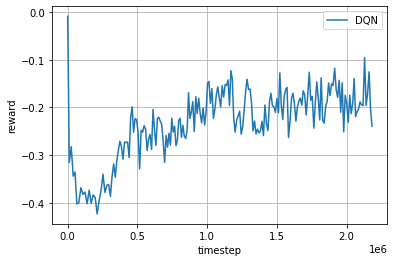

In [24]:
# Save model prior to training
save_dir = 'models/dqn/selfplay/{}'.format(dqn_model_name)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
state_dict = agent.get_state_dict()
torch.save(state_dict, os.path.join(save_dir, 'model_pretrain.pth'))

# Training Loop
for episode in range(episode_num):

    # Generate data from the environment
    trajectories, _ = env.run(is_training=True)

    # Feed transitions into agent memory, and train the agent
    for ts in trajectories[0]:
        agent.feed(ts)

    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')

# Save model
state_dict = agent.get_state_dict() 
torch.save(state_dict, os.path.join(save_dir, 'model_posttrain.pth'))

### Weight Comparison

In [25]:
model_dqn_pre = torch.load('models/dqn/selfplay/{}/model_pretrain.pth'.format(dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/selfplay/{}/model_posttrain.pth'.format(dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [26]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.5.weight'].flatten().tolist()

In [27]:
weights_q_estim_post = model_q_estim_post['fc_layers.5.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.5.weight'].flatten().tolist()

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [30]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

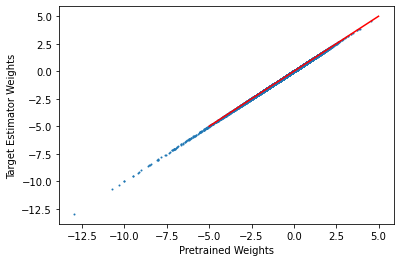

In [31]:
# s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=1)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

# Misc.

## Weight Comparison

In [ ]:
state = 'all'
action = 'all'
model_name = 'all_states_all_actions'
dqn_model_name = 'all_states_all_actions'
model_dqn_pre = torch.load('models/dqn/{}/{}/{}/model_pretrain.pth'.format(state,action,dqn_model_name), map_location='cpu')
model_dqn_post = torch.load('models/dqn/{}/{}/{}/model_posttrain.pth'.format(state,action,dqn_model_name), map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

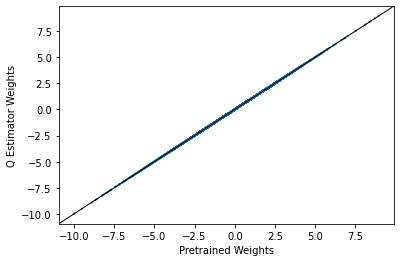

In [ ]:
s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=s)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()

## Weight Comparison (baseline)

In [ ]:
# state = 'all'
# action = 'all'
# model_name = 'all_states_all_actions'
# dqn_model_name = 'all_states_all_actions'
# model_dqn_pre = torch.load('models/dqn/{}/{}/{}/model_pretrain.pth'.format(state,action,dqn_model_name), map_location='cpu')
# model_dqn_post = torch.load('models/dqn/{}/{}/{}/model_posttrain.pth'.format(state,action,dqn_model_name), map_location='cpu')
model_dqn_pre = torch.load('models/dqn/base/model_pretrain.pth', map_location='cpu')
model_dqn_post = torch.load('models/dqn/base/model_posttrain.pth', map_location='cpu')
model_q_estim_pre = model_dqn_pre['dqn_q_estimator']
model_target_estim_pre = model_dqn_pre['dqn_target_estimator']
model_q_estim_post = model_dqn_post['dqn_q_estimator']
model_target_estim_post = model_dqn_post['dqn_target_estimator']

In [ ]:
weights_q_estim_pre = model_q_estim_pre['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_pre = model_target_estim_pre['fc_layers.1.weight'].flatten().tolist()

In [ ]:
weights_q_estim_post = model_q_estim_post['fc_layers.1.weight'].flatten().tolist()
weights_target_estim_post = model_target_estim_post['fc_layers.1.weight'].flatten().tolist()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dqn_model = 'Q Estimator'
weights_pre = weights_q_estim_pre
weights_post = weights_q_estim_post

In [ ]:
dqn_model = 'Target Estimator'
weights_pre = weights_target_estim_pre
weights_post = weights_target_estim_post

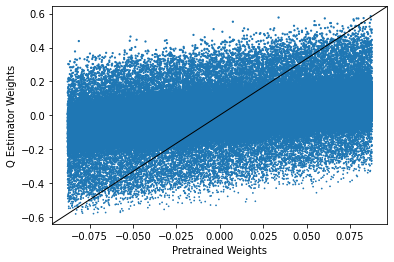

In [ ]:
s = np.subtract(weights_post, weights_pre) + 1
fig = plt.figure()
plt.scatter(weights_pre, weights_post, s=s)
plt.xlabel('Pretrained Weights')
plt.ylabel('{} Weights'.format(dqn_model))
x = np.linspace(-5,5,100)
plt.plot(x, x, '-r')
plt.show()